In [1]:
from algorithms.prioritized_sweeping import *
from algorithms.value_iteration import *
from domains.cat_vs_monsters import *
from domains.gridworld import *
from fine_tuning.evolution_strategies_for_prioritized_sweeping import *
from matplotlib import pyplot as plt
from utils.utils import *
import pandas as pd

In [2]:
def run_domain(domain, domain_name, prioritized_sweeping_args, hyperparameter_bounds):
    print(f"-- {domain_name} Domain --\n")
    instance = ValueIteration(domain)
    cvm_v_map, cvm_policy_map, iterations = instance.run_standard_value_iteration(init_func)
    print("Actual Optimal Value Function of States\n")
    df = pd.DataFrame(cvm_v_map)
    print(df)
    print("\nActual Optimal Policy Map of States\n")
    df = pd.DataFrame(cvm_policy_map)
    print(df)
    print("\nRunning Prioritized Sweeping Algorithm...\n")

    instance = PrioritizedSweeping(domain, cvm_v_map)
    q_map, max_norm_val, iterations, elapsed_time = instance.prioritized_sweeping(*prioritized_sweeping_args)

    print(f"The prioritized sweeping algorithm terminated after {iterations} iterations")
    print(f"It achieved a max norm value of {max_norm_val}, taking {elapsed_time:.4f} seconds\n")

    ps_vmap, ps_policy_map = get_vmap_policy_map(q_map, instance)
    print("Value Function of States output by Prioritized Sweeping\n")
    df = pd.DataFrame(ps_vmap)
    print(df)
    print("\n")

    df = pd.DataFrame(ps_policy_map)
    print(df)
    print("\n")

    es_ps = EvolutionStrategyForPrioritizedSweeping(prioritized_sweeping=PrioritizedSweeping, mdp=domain, optimal_v_map=cvm_v_map)
    best_params, min_loss, generation_min_loss_list = es_ps.run_es(hyperparameter_bounds, pop_size=50, generations=20, top_parents=10, mutation_strength=0.2)

    print("Best hyperparameters found:", best_params)
    print("Best Max Norm Value:", min_loss)

    plt.figure(figsize=(10, 6))
    plt.plot(generation_min_loss_list)
    plt.xlabel("Generation")
    plt.ylabel("Best Max Norm Value")
    plt.grid(True)
    plt.show()

-- Cat vs Monsters Domain --

Actual Optimal Value Function of States

        0       1       2       3       4
0  2.6637  2.9968  2.8116   3.667  4.8496
1  2.9712    3.51  4.0818  4.8496  7.1647
2  2.5935       X       X       X  8.4687
3  2.0992  1.0849       X  8.6097  9.5269
4  1.0849  4.9465  8.4687  9.5269  0.0000

Actual Optimal Policy Map of States

   0     1  2     3  4
0  →     ↓  ←  ↓(M)  ↓
1  →     →  →     →  ↓
2  ↑     X  X     X  ↓
3  ↑     ←  X     ↓  ↓
4  ↑  →(M)  →     →  G

Running Prioritized Sweeping Algorithm...

The prioritized sweeping algorithm terminated after 1000 iterations
It achieved a max norm value of 2.5999586187986186, taking 1.5720 seconds

Value Function of States output by Prioritized Sweeping

          0         1         2         3         4
0  4.234171  4.385373  4.262697  6.266959  6.655012
1  4.876026  5.495982  5.778232  6.052797  6.370119
2  4.114851         X         X         X  8.023892
3  3.827553   2.92837         X  8.540029  8.6156

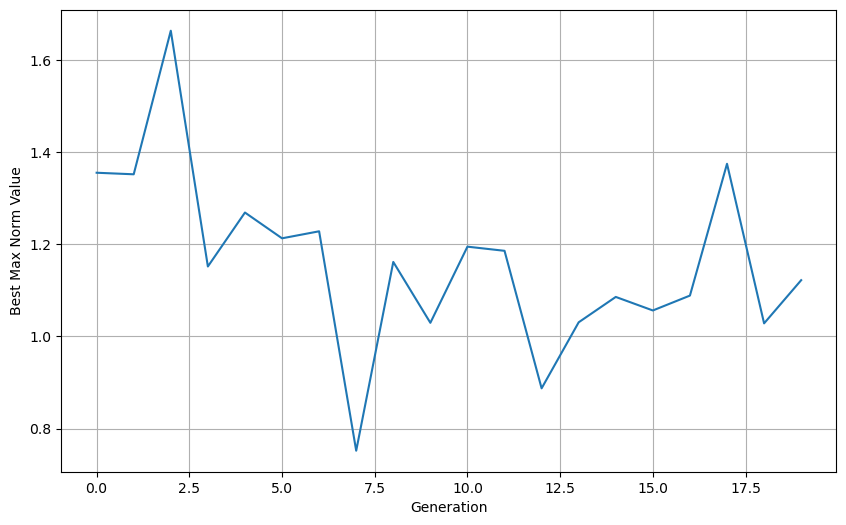

-- 687-Gridworld Domain --

Actual Optimal Value Function of States

        0       1       2       3       4
0  4.0187  4.5548  5.1576  5.8337  6.4553
1  4.3716  5.0324  5.8013  6.6473  7.3907
2  3.8672  4.3900       X  7.5769  8.4637
3  3.4183  3.8319       X  8.5738  9.6946
4  2.9978  2.9309  6.0733  9.6946  0.0000

Actual Optimal Policy Map of States

   0  1     2  3  4
0  →  →     →  ↓  ↓
1  →  →     →  ↓  ↓
2  ↑  ↑     X  ↓  ↓
3  ↑  ↑     X  ↓  ↓
4  ↑  ↑  →(M)  →  G

Running Prioritized Sweeping Algorithm...

The prioritized sweeping algorithm terminated after 577 iterations
It achieved a max norm value of 0.4504077801210169, taking 0.2729 seconds

Value Function of States output by Prioritized Sweeping

          0         1         2         3         4
0  4.206559  4.769938  5.346052  6.086755  6.863540
1  4.594328  5.308496  5.769256  6.875171  7.841108
2  4.072083  4.600808         X  7.731418  8.687875
3  3.573905  4.144905         X  8.461377  9.901714
4  3.194499  2.781

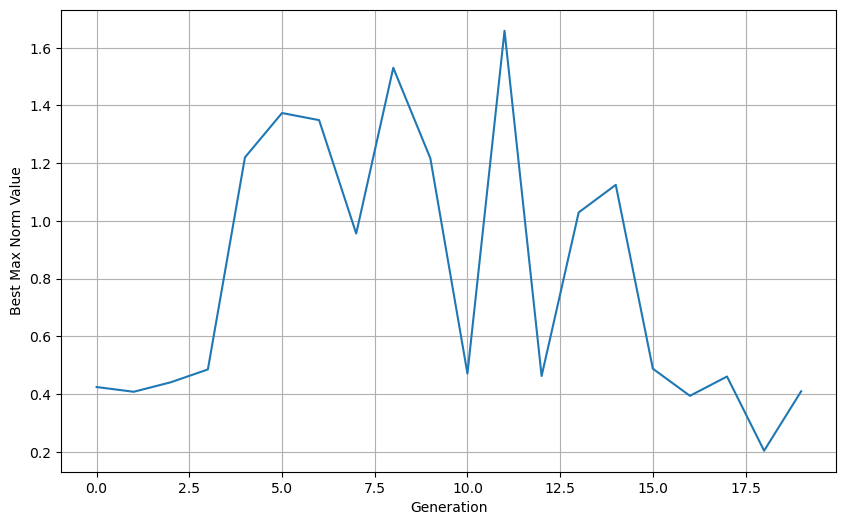

In [3]:
theta, alpha, epsilon = 0.1, 0.1, 0.1
prioritized_sweeping_args = [theta, alpha, epsilon]
hyperparameter_bounds = {'theta': (0.01, 1.0),'alpha': (0.01, 1.0),'epsilon': (0.01, 1.0),'n': (1, 100),'niter': (50, 400),'episode_length': (50, 400)}
run_domain(Cat_vs_Monsters(), "Cat vs Monsters", prioritized_sweeping_args, hyperparameter_bounds)
run_domain(Gridworld(), "687-Gridworld", prioritized_sweeping_args, hyperparameter_bounds)